# 2020-09-29

+ Times in astronomy 
+ Predicting the future

## Time scales in astronomy

### Condensed version: see [2020-09-24.ipynb](2020-09-24.ipynb) for more detail

The formal definition of these scales are maintained by the International Astronomical Union [Standards of Fundamental Astronomy](http://www.iausofa.org/) (SOFA). The document [SOFA Time Scale and Calendar Tools](http://www.iausofa.org/sofa_ts_c.pdf), sections 2 and 3 are particularly helpful if you want a brief, high-level summary of the time scales, and this overview draws heavily on them.

### Video summary of this section

Video link: https://youtu.be/vRGr7qYzVRU


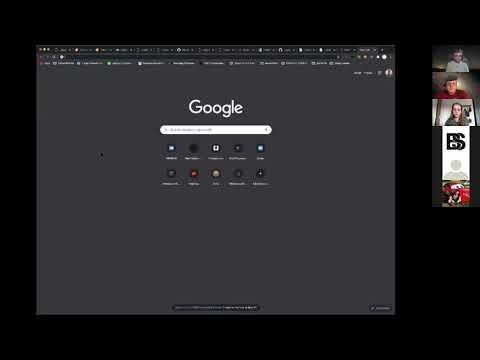

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('vRGr7qYzVRU')

### Big picture

The sheer number of time scales used in astronomy is intimidating; the diagram below, from the [astropy time documentation](http://astropy.readthedocs.io/en/stable/time/index.html), shows all seven of them (the blue boxes):

![Time scales and relationships](media/2020-09-29-time_scale_conversion.png)

Two of these matter to us:

+ **UTC** is the time used by computers; it is the time in Greenwich, England. It is a combination of atomic clock time with "leap seconds" added occasionally to keep midnight roughly at the same time during the night. 
+ **TDB** is atomic clock time, with some offsets to account for relativistic effects. It is especially important for precise time measurements.

### Time formats


There are several formats for representing times. For example, "June 30, 1994 11:59:59PM" and "1994-06-30 23:59:59" are both ways of writing the same time. A good list of commont formats is in the [astropy documentation for time formats](http://astropy.readthedocs.io/en/stable/time/index.html#time-format).

One common format, ISOT, is this: `1994-06-30T23:59:59`

Note that the order of items in the date is always YEAR-MONTH-DAY, that month and day are always two digits, and that the time is on a 24-clock.

### Julian Date and Modified Julian Date

Julian date is the number of days that have elapsed since noon on a particular day about 7,000 years ago. Times are included as a fraction of a day. 

Different time scales (like UT1 and TAI) have days that correspond to diferent amounts of time, so when a Julian date is used it should be made clear what time scale it is on.

One important time scale, UTC, should NOT be converted directly to a Julian date because the number of seconds in a day in UTC depends on the day. Most days it is 86,400 but the is one second longer or shorter on UTC leap second days.

To repeat, **do not express a time on the UTC scale as a Julian date**. Convert to a different scale first, then be explicit about which time scale you are using when you wwrite a Julian date.

#### Modified Julian date

The JD has a couple of oddities:

+ The day starts at noon, not midnight.
+ There have been over 2.4 million days since the designated start of the Julian date system, so it is easy to unintentionally round a Julian date when it is represented in a computer.

The modified Julian date (MJD) is the Julian data minus 2,400,000.5. The decimal part shifts the MJD to begin at midnight instead of noon, and subtracting off 2.4 million makes it easier to represent the date on a computer.

As with the JD, one should clearly indicate the time scale used when providing a MJD, and UTC is **not** an approporiate time scale.

### Software for converting between time scales and formats

Two options:

1. The example below illustrate using [astropy](http://astropy.org) to do time conversions. Very detailed documentation for astropy's `Time` class is [here](https://docs.astropy.org/en/stable/time/index.html#), but you may find it overwhelming if you are new to python. 

3. Google. Not the best for doing science but great when you just need a number quickly.

The examples below walk through some of the basic uses.

### How to run these code examples

You can simply read this notebook without running any of the code. If you want to try the code, feel free to modify the cells and run them.

The program in each cell can be run by:

+ Clicking in the cell with the mouse, then
+ Holding down the shift key and pushing `Enter`.

Interspersed with the code below are several exercises. Give them a try!

#### *Run ALL the cells in order if you choose to run any of them*

In [2]:
# Load Time from astropy 
from astropy.time import Time

#### Create a time

To create a time you need to supply three things:

+ The time itself.
+ The scale the time is in (a UTC day is not the same length as a UT1 day, nor is it alwys the same length as a TAI/TT day).
+ The format the time is in.

If you leave out the last two, astropy will try to guess the scale and format. Try to avoid that by being explicit. That is usually fine for the *format* but you should always *explicitly set the scale*.

The example below creates a variable named `my_time` that holds the time September 15, 2020 at 9:36AM Central Daylight Time.

#### Notice that the convertion to UTC has been done manually by ADDING 5 HOURS to that time.

In [3]:
my_time = Time("2020-09-15 14:36:00", scale='utc')

#### Display the time you created

Creating a variable to hold a time does not automatically print in on the screen. To display it, use the print command, like this:

In [4]:
print(my_time)

2020-09-15 14:36:00.000


#### Convert a time to a different time scale

The list of time scales that astropy can represent is listed in [their documentation](); it includes all of the scales in the diagram at the top of this notebook.

Converting between time scales is very straightforward: add a period and the abbreviation for that time scale in lower case (e.g. tdb for Barycentric Dynamical Time). 

In [5]:
print(my_time.tdb)

2020-09-15 14:37:09.182


#### Some time scales will take longer to compute the first time you do them

UT1, for example, requires downloading a large table of Earth orientation information the first time you use it. Be patient.

In [6]:
print(my_time.ut1)

2020-09-15 14:35:59.824


#### Changing the format

Changing the format is also straightforward; add the abbreviation for the format you want ([listed here](http://astropy.readthedocs.io/en/stable/time/index.html#time-format)) to the end of the variable name.

In [7]:
print("Time in ISOT format:", my_time.isot)
print("Time in Julian Year format:", my_time.jyear)

Time in ISOT format: 2020-09-15T14:36:00.000
Time in Julian Year format: 2020.706662103582


#### Changing the format and scale

Both the format and the scale can be changed by combining the previous two operations, but the scale change must come before the format change, like this:

In [8]:
print(my_time.tdb.jd)

2459108.1091340557


### Wait, no time zone support?

Very briefly, no. This matters far less than might be expected because the times of interest are usually extracted from the header of a FITS file, in the UTC scale, in the ISOT format (or something close to it).

A much longer but more complicated answer is yes; read [this documentation](http://astropy.readthedocs.io/en/stable/time/index.html#timezones) for details.

#### Julian Date and UTC do not mix

Julian Date is a time format that is a little special: UTC times cannot sensibly be represented as Julian dates because not all UTC days have the same length.

Unfortunately, astropy will give you a UTC in JD if you ask:

In [9]:
print(my_time.jd)

2459108.1083333334


### Convert to TDB and THEN calculate the julian date...

#### ...and specify the time scale chosen when you communicate your data!

In [10]:
print(my_time.tdb.jd)
print(my_time.tdb.mjd)

2459108.1091340557
59107.609134055616


## Predicting the future

Projects in this course will be focused on measuring *when* something happens (exoplanet transit, variable star maximum). The objects we will be looking at have been studied by others and for timing they report two numbers:

+ Epoch -- a day/time at which the event has happened in the past.
+ Period -- amount of time, typically in days, between repetitions of the event.

### Video summary of this section

Video link: https://youtu.be/Wa8zwUsB1Po

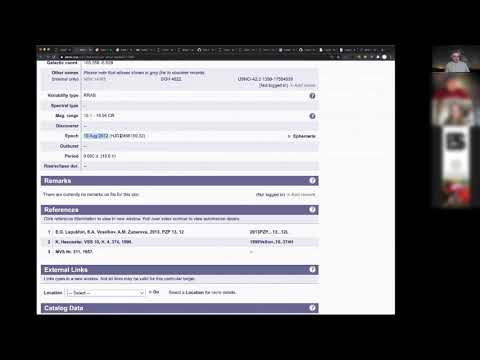

In [11]:
YouTubeVideo('Wa8zwUsB1Po')

### Example: predicting lunch time

Suppose I eat lunch today at noon. If I eat lunch every 1.0417 days (25 hours) when will I next eat lunch?

+ Epoch is noon CDT....in UTC that is: 2020-09-29T17:00:00
+ Period is 1.0417 days

Next lunch: 2020-09-30T18:00:00

In [12]:
lunch_time = Time('2020-09-29T17:00:00')
print(lunch_time)

2020-09-29T17:00:00.000


In [13]:
next_lunch = lunch_time + 1.0417

In [14]:
next_lunch

<Time object: scale='utc' format='isot' value=2020-09-30T18:00:02.880>

#### Better way to add a day

In [15]:
import astropy.units as u

next_lunch = lunch_time + 1.0417 * u.day

In [16]:
next_lunch

<Time object: scale='utc' format='isot' value=2020-09-30T18:00:02.880>

### Example: variable star V0440 Lac

From https://www.aavso.org/vsx/index.php?view=detail.top&oid=17029 I get this information:

+ Epoch: HJD 2456159.32 (Some time on August 19, 2012)
+ Period: 0.650 d  (15.6 h)

The epoch in this case is the time of maximum for this variable star.

**Note:** the "H" at the beginning of "HJD" is important; it stands for "heliocentric". We will come back to it later.

What is the next time of maximum after the epoch date?

In [17]:
vsx_epoch = Time(2456159.32, scale='utc', format='jd')
period = 0.650 * u.day
print(vsx_epoch + period)

2456159.9699999997


When is the 5 fifth maximum after epoch be? Add 5 periods to the original epoch.

In [18]:
print(vsx_epoch + 5 * period)

2456162.57


In [19]:
fifth_vsx_max = vsx_epoch + 5 * period
fifth_vsx_max.isot

'2012-08-23T01:40:48.000'

If we wanted to observe that with our telescope at what time + date would we need to be at the  telescope?


2012-08-22 20:40:48

In [20]:
(fifth_vsx_max - 5 *u.hour).isot

'2012-08-22T20:40:48.000'

### V0440 Lac continued: predicting upcoming maximums

The formula for predicting maxima given an epoch, called $t_{\text{epoch}}$ below, and a period, called $P$ below, is

\begin{equation}
t_{\text{future}} = t_{\text{epoch}} + N * P
\end{equation}

Let's use that to calculate some of the future maxima of V0440 Lac

In [21]:
import numpy as np

# You will need to change this value
n_start = 4558

# Make this an astropy time
t_epoch = Time(2456159.32, scale='utc', format='jd')  

# Fill in period below 
period = 0.650  * u.day

n_end = n_start + 60

future_events = t_epoch + period * np.arange(n_start, n_end)

Need to find $N$ for roughly now.

In [22]:
t_now = Time("2020-09-29T14:56:00")

In [23]:
(t_now - t_epoch) / period

<Quantity 4558.15730057>

In [24]:
for event, n in zip(future_events, np.arange(n_start, n_end)):
    print(n, event.isot)

4558 2020-09-29T12:28:46.000
4559 2020-09-30T04:04:46.000
4560 2020-09-30T19:40:46.000
4561 2020-10-01T11:16:46.000
4562 2020-10-02T02:52:46.000
4563 2020-10-02T18:28:46.000
4564 2020-10-03T10:04:46.000
4565 2020-10-04T01:40:46.000
4566 2020-10-04T17:16:46.000
4567 2020-10-05T08:52:46.000
4568 2020-10-06T00:28:46.000
4569 2020-10-06T16:04:46.000
4570 2020-10-07T07:40:46.000
4571 2020-10-07T23:16:46.000
4572 2020-10-08T14:52:46.000
4573 2020-10-09T06:28:46.000
4574 2020-10-09T22:04:46.000
4575 2020-10-10T13:40:46.000
4576 2020-10-11T05:16:46.000
4577 2020-10-11T20:52:46.000
4578 2020-10-12T12:28:46.000
4579 2020-10-13T04:04:46.000
4580 2020-10-13T19:40:46.000
4581 2020-10-14T11:16:46.000
4582 2020-10-15T02:52:46.000
4583 2020-10-15T18:28:46.000
4584 2020-10-16T10:04:46.000
4585 2020-10-17T01:40:46.000
4586 2020-10-17T17:16:46.000
4587 2020-10-18T08:52:46.000
4588 2020-10-19T00:28:46.000
4589 2020-10-19T16:04:46.000
4590 2020-10-20T07:40:46.000
4591 2020-10-20T23:16:46.000
4592 2020-10-2

Suppose that the reported period for V0440 Lac is incorrect by 1 second.

How many seconds is the time of maximum for the 4617th maximum after the epoch?

4716 seconds, about 78 minutes, which is an easy time to measure.

In [25]:
4716/60

78.6